# Fully Connected Neural Network with Keras

### Importing all the necessary packages That are required

In [1]:
%matplotlib inline

import os
import keras
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from os.path import join
from keras.models import Model
from tensorflow import keras
from keras import backend as BD
from keras.regularizers import l2
from scipy.stats import reciprocal
from keras.models import Sequential
from matplotlib.pyplot import imshow
from keras.applications import VGG16
from keras.applications import VGG19
from keras.preprocessing import image
from keras.applications import MobileNetV2
from keras.layers import Conv2D, MaxPooling2D
from keras_applications.resnet_v2 import ResNet50V2
from sklearn.model_selection import RandomizedSearchCV
from keras_applications.mobilenet_v2 import MobileNetV2
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import preprocess_input
from keras.applications.imagenet_utils import preprocess_input
from keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization

Using TensorFlow backend.


### Setting the Seed 

In [2]:
# Inidcating That it is necessary for any hash based algorithms to produce reproducable values 
os.environ['PYTHONHASHSEED'] = '0'
np.random.seed(2020) # Seed for numpy random numbers
random.seed(2020) # Seed for python 
tf.random.set_seed(2020) # Seed for tensorflow
# We need to force tensorflow to use single thread for getting reproducable results
# Because multiple threads will effect the reproducability (getting the same results everytime)
# Cur_Session = tf.compat.v1.Session(graph = tf.get_default_graph(), config = session_conf)
# BD.set_session(Cur_Session)

#### Loading the Train, Test, Validation Data Sets 

In [3]:
# preliminary data Exploration 
hair_colours = ['black', 'blond', 'brown', 'gray']
dataset_directory = 'C:\\Users\\suhas\\Documents\\study\\ML Practice\\image_dataset'  ## CHANGE TO YOUR OWN DIRECTORY

images_train = np.load(join(dataset_directory, 'train_images.npy')) # loading images_train
labels_train = np.load(join(dataset_directory, 'train_labels.npy')) # loading labels_train

images_val = np.load(join(dataset_directory, 'val_images.npy'))
labels_val = np.load(join(dataset_directory, 'val_labels.npy'))
files_val = np.load(join(dataset_directory, 'val_files.npy'))

images_test_public = np.load(join(dataset_directory, 'test_public_images.npy'))
files_test_public = np.load(join(dataset_directory, 'test_public_files.npy'))

#### Normalizing the Data such that the value would now range in between 0 and 1

In [4]:
image_size = 48
images_train_rs = images_train.reshape([-1, image_size, image_size, 3]) / 255.0 # Normalizing the values
images_val_rs = images_val.reshape([-1, image_size, image_size, 3]) / 255.0 # Normalizing the values
images_test_public_rs = images_test_public.reshape([-1, image_size, image_size, 3]) / 255.0 # normalizing the values
print("Train Data Shape:", images_train_rs.shape)
print("Validation Data Shape:", images_val_rs.shape)
print("Test Data Shape:", images_test_public_rs.shape)

Train Data Shape: (98479, 48, 48, 3)
Validation Data Shape: (12270, 48, 48, 3)
Test Data Shape: (11921, 48, 48, 3)


####  Creating a One Hot Vector for the Labels data
currently our target variable ranges in between 0-3 representing hair colors, but we need to provide the labels as one hot vector meaning in our case 1000, 0100, 0010, 0001 represents black, blond, brown, gray such that at any point of time one class has the value 1 and the others are set to 0.

In [5]:
num_classes = len(hair_colours) # no of classes
labels_train_rs = keras.utils.to_categorical(labels_train, num_classes) # Generating a One hot vector for the Train labels Data
labels_val_rs = keras.utils.to_categorical(labels_val, num_classes) # Generating One Hot vector for the Validation Data
print("Train Labels Shape:", labels_train_rs.shape)
print("Validation Labels Shape:", labels_val_rs.shape)

Train Labels Shape: (98479, 4)
Validation Labels Shape: (12270, 4)


In [6]:
print("Input dimensions of images_train_rs are: ",images_train_rs.shape[1:]) # Excludes the first column that represnts no of rows

Input dimensions of images_train_rs are:  (48, 48, 3)


Now the data is ready for the Deep learning models.

#### Fully Connected Neural Network Model Building 

In [7]:
FCNN1 = keras.models.Sequential()
FCNN1.add(keras.layers.Flatten(input_shape=[48,48,3]))
FCNN1.add(keras.layers.Dense(1000, activation = "elu"))
FCNN1.add(keras.layers.Dense(500, activation = "elu"))
FCNN1.add(keras.layers.Dense(300, activation = "elu"))
FCNN1.add(keras.layers.Dense(100, activation = "elu"))
FCNN1.add(keras.layers.Dense(num_classes, activation="softmax"))
FCNN1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 6912)              0         
_________________________________________________________________
dense (Dense)                (None, 1000)              6913000   
_________________________________________________________________
dense_1 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_2 (Dense)              (None, 300)               150300    
_________________________________________________________________
dense_3 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 404       
Total params: 7,594,304
Trainable params: 7,594,304
Non-trainable params: 0
______________________________________________

In [8]:
# Compiling the Model
FCNN1.compile(loss = keras.losses.categorical_crossentropy, optimizer = "adam", metrics = ["accuracy"])
# Fitting the Model
FCNN1_history = FCNN1.fit(images_train_rs, labels_train_rs,
                          batch_size=300,
                          epochs = 14,
                          validation_data = (images_val_rs, labels_val_rs))

Epoch 1/14


InternalError:  Blas GEMM launch failed : a.shape=(300, 6912), b.shape=(6912, 1000), m=300, n=1000, k=6912
	 [[node sequential/dense/MatMul (defined at <ipython-input-8-59101d323b60>:7) ]] [Op:__inference_train_function_855]

Function call stack:
train_function


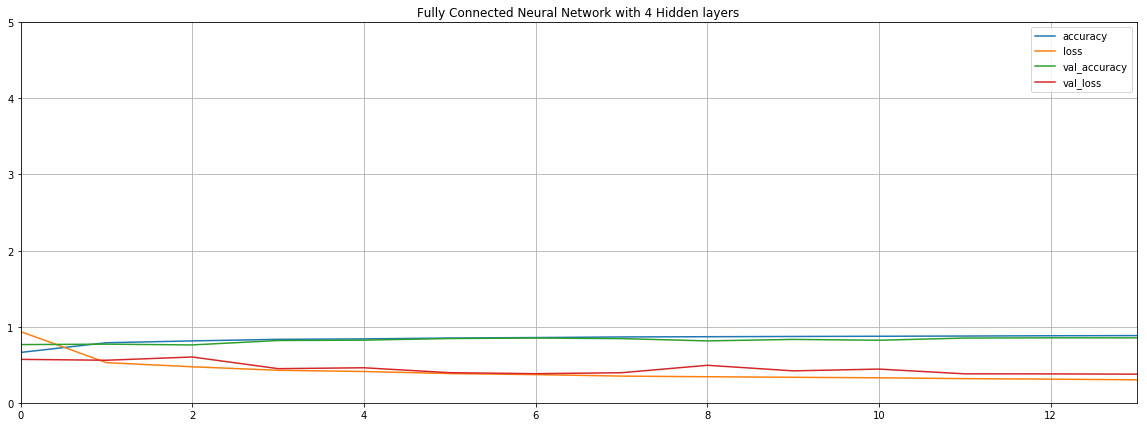

In [9]:
# Plotting the accuray and loss for training and validation data
pd.DataFrame(FCNN1_history.history).plot(figsize=(20, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("Fully Connected Neural Network with 4 Hidden layers")
plt.show()

In [10]:
# Predicting the Probabilities of which class an image belongs to
FCNN1_probabilities = FCNN1.predict([images_test_public_rs])

In [11]:
#### Converting the one hot encoding probability values back to a single column representing wich class does an image belongs to 
Pred_Labels = np.argmax(FCNN1_probabilities, axis = 1)
print("the first five Predicted classes are:", Pred_Labels)
print("Length of Predicted labels:", len(Pred_Labels))

the first five Predicted classes are: [0 1 0 ... 0 0 1]
Length of Predicted labels: 11921


#### Creating a Data Frame for Kaggle Submission

In [ ]:
# creating a data frame for predicted values
df1 = pd.DataFrame(Pred_Labels, columns=['Prediction'])

In [ ]:
# creating a data frame for files_val which contains image names
df2 = pd.DataFrame(files_test_public, columns=['ID'])
df2.tail()

In [ ]:
# Joining the two data frames through the index
FCNN1_45693242 = df2.merge(df1, left_index=True, right_index=True)

In [ ]:
FCNN1_45693242.to_csv (r'C:\\Users\\suhas\\Documents\\study\\ML Practice\\FCNN1_45693242.csv', index = False, header=True)

#### Saving the Model

In [ ]:
FCNN1.save("FCNN1.h5")

In [9]:
pip install nbmerge

  Running setup.py bdist_wheel for nbmerge: started
  Running setup.py bdist_wheel for nbmerge: finished with status 'done'
  Stored in directory: C:\Users\suhas\AppData\Local\pip\Cache\wheels\93\0c\59\ac91905c182ce43c4f39a50b5381c9485049cfe913237872ff
Successfully built nbmerge
Note: you may need to restart the kernel to use updated packages.


  The script nbmerge.exe is installed in 'C:\Users\suhas\.conda\envs\RunonGpu\Scripts' which is not on PATH.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You are using pip version 10.0.1, however version 20.2b1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [6]:
import json
import os
notebooks_to_merge = [file for file in os.listdir(os.getcwd()) if file.endswith('.ipynb')]
notebooks_to_merge.sort()
print(notebooks_to_merge)

['CNN.ipynb', 'CNNmerged.ipynb', 'FCNN.ipynb', 'TLDA.ipynb']


In [13]:
def combine_ipynb_files(list_of_notebooks, combined_file_name):
    with open (notebooks_to_merge[0], mode = 'r', encoding = 'utf-8') as f:
        a = json.load (f)
    for notebook in notebooks_to_merge[1:]:
        with open (notebook, mode = 'r', encoding = 'utf-8') as f:
            b = json.load(f)
            a['cells'].extend(b['cells'])
    with open(combined_file_name, mode='w', encoding='utf-8') as f:
        json.dump(a, f)
    print('Generated file: "{}".'.format(combined_file_name))
    return (os.path.realpath(combined_file_name))


combine_ipynb_files(notebooks_to_merge, "merged2.ipynb")

JSONDecodeError: Expecting value: line 1 column 1 (char 0)